# Python Project 
## Instagram Profile Data Analysis

________________________________________________________________________________________________________________

### Data Analysis Process

#### Asking Questions (Objectives)
Given data and ask questions to be answered using analysis.

#### Data Wrangling
1. **Gather**  
   Collect the data needed to answer your questions.

2. **Assessing**  
   Explore the data, check data quality, and identify issues.

3. **Cleaning**  
   Fix issues by modifying, replacing, renaming, or removing problematic data.

#### Perform EDA (Exploratory Data Analysis)
- Explore data using statistics and visuals  
- Discover data patterns  
- Understand data distribution

#### Draw Conclusion
Summarize key findings.

#### Communicate Results
Share the results.

______________________________________________________________________________________________________

### here is a description of the dataset
**`Impressions`**:- a numeric value that represents the number of distinct people who saw your post.

**`From Home`** , **`From Hashtags`** , **`From Explore`** , **`From Other`**:
* numeric value represent the number of people who seen the post from different sources 
* note a single user can see the same psot from different sources and that why the numbers may add up more than the impressions 

**`Saves`**:-a numeric value that shows the number of people who saved the post.

**`Comments`**:-a numeric value that shows the number of people who commented on the post.

**`Shares`**:-a numeric value that shows the number of people who shared the post.

**`Likes`**:-a numeric value that shows the number of people who liked the post.

**`Profile Visits`**:-a numeric value that shows the number of people who visited the profile through the post.

**`Follows`**:-a numeric value that shows the number of people who followed through the post. 

**`Caption`**:-a string that represent the caption made on the post .

**`Hashtags`**:-a string that shows all the hashtags realated to the post each hashtag seprated by # .

___

### questions to be answered by 
- How are the impressions distributed across my Instagram posts
- what is the correlation between Impressions and likes and does having more Impressions on the post leads to more likes 
- which source contributes the most to total impressions 
- does having a longer caption leads to more impression 
- does the increase in the number of different hashtags increase Impressions on the post 
- which hashtags appear most frequently in high impression posts 
- which hashtags are associated with the highest average impressions 
- do posts with new or unique hashtags perform better than those with repeated ones 
- does havig more impressions leads to more engagement (likes + shares + comments + saves) and engagement rate 
- what is the corelation between profile visits , follows , likes, comments , saves 


---

#### import the needed libaries for the analysis

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 10)

## Data wrngling
### 1-gather data
#### open the csv file in the python file 

In [30]:
profile = pd.read_csv(r'..\data\Instagram_data.csv',encoding='latin1')

#### Show the fisrt 5 rows of the file 

In [31]:
profile.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visualizations that every Financial Data Analyst/Scientist should know.,#finance #money #business #investing #investment #trading #stockmarket #data #datascience #dataanalysis #dataanalytics #datascientist #machinelearning #python #pythonprogramming #pythonprojects #pythoncode #artificialintelligence #ai #dataanalyst #amankharwal #thecleverprogrammer
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project ideas on healthcare. If you want to become a data science professional in the healthcare domain then you must try to work on these projects.,#healthcare #health #covid #data #datascience #dataanalysis #dataanalytics #datascientist #machinelearning #python #pythonprogramming #pythonprojects #pythoncode #artificialintelligence #ai #dataanalyst #amankharwal #thecleverprogrammer
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model and giving inputs to your trained model to make predictions using Python.,#data #datascience #dataanalysis #dataanalytics #datascientist #machinelearning #python #pythonprogramming #pythonprojects #pythoncode #artificialintelligence #ai #deeplearning #machinelearningprojects #datascienceprojects #amankharwal #thecleverprogrammer #machinelearningmodels


### see insights about the file 

In [32]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### 2-data acesssing
- no column contain null values
- the file contain 119 rows (posts) and 13 columns
- all columns are in its correct datatype
- there is no id column (no unique idintifier for each post) 
- drop column From Other it will not be used
- hashtages have many items in one cell should be seprated or added into a list
- make a df that contains each hashtag seperetly
- add a column for both number of hashtags and caption length
- a new column should be added engagement (likes + shares + comments + saves)
- engament rate column , follow-profile_visits ratio 
- a flag column should be added for low mid high very_high impressions




##### show the file columns so you accsess it easily

In [33]:
profile.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

### 3-data cleaning
- make id column to uniquly idintify each post

In [34]:
profile['id'] = range(0,profile.shape[0]) # make a id column
profile = profile.iloc[:,[13,0,1,2,3,4,5,6,7,8,9,10,11,12]] # make the id column the first column

- see if there duplicate values

In [35]:
profile.duplicated().sum() # no dublicate values

np.int64(0)

- drop column From Other

In [36]:
profile.drop(columns='From Other' , inplace=True)

- seprate the hashtags into a list

In [37]:
profile['Hashtags'] = profile['Hashtags'].apply(lambda x : str(x).split('\xa0'))
profile['Hashtags'][profile['Hashtags'].index == 0]

0    [#finance, #money, #business, #investing, #investment, #trading, #stockmarket, #data, #datascience, #dataanalysis, #dataanalytics, #datascientist, #machinelearning, #python, #pythonprogramming, #pythonprojects, #pythoncode, #artificialintelligence, #ai, #dataanalyst, #amankharwal, #thecleverprogrammer]
Name: Hashtags, dtype: object

- df that contains each hashtag seperetly

In [38]:
hashtags_df = profile['Hashtags'].explode()
hashtags_df.value_counts()

Hashtags
#amankharwal            117
#thecleverprogrammer    117
#python                 109
#machinelearning         97
#pythonprogramming       95
                       ... 
#whatsapp                 1
#pythonprogram            1
@codergallery             1
#sql                      1
#mysql                    1
Name: count, Length: 164, dtype: int64

- add a column number of hashtags

In [39]:

profile['number of hashtags'] = profile['Hashtags'].apply(lambda x : len(x))
profile['number of hashtags']

0      22
1      18
2      18
3      11
4      29
       ..
114    17
115    18
116    18
117    17
118    11
Name: number of hashtags, Length: 119, dtype: int64

- add a column caption word length

In [40]:
profile['caption length'] = profile['Caption'].apply(lambda x : len(str(x).split(' ')))
profile['caption length']

0      16
1      34
2      20
3      41
4      28
       ..
114    16
115    50
116    34
117    16
118    14
Name: caption length, Length: 119, dtype: int64

- add column engagement (likes + shares + comments + saves)

In [41]:
profile['engagement'] = profile['Likes'] + profile['Shares'] + profile['Comments'] + profile['Saves']
profile['engagement']

0       274
1       439
2       184
3       402
4       228
       ... 
114     986
115     288
116     129
117    1721
118    1127
Name: engagement, Length: 119, dtype: int64

- add a flag column for Impression Level(low mid high very_high)

In [42]:
q30 = profile['Impressions'].quantile(0.3)
q70 = profile['Impressions'].quantile(0.7)
q90 = profile['Impressions'].quantile(0.90)

def get_impression_level(imp) :
    if imp <= q30 : return 'LOW'
    elif imp > q30 and imp <= q70 : return 'MID'
    elif imp > q70 and imp <= q90 : return 'HIGH'
    else : return 'VERY HIGH'


profile['Impression Level'] = profile['Impressions'].apply(get_impression_level)
profile[['Impressions','Impression Level']]
profile['Impression Level'].value_counts().sort_index()

Impression Level
HIGH         25
LOW          36
MID          47
VERY HIGH    11
Name: count, dtype: int64

- add columns Engament Rate and Follows/Visits Ratio

In [43]:
profile['engagement rate'] = (profile['Likes'] + profile['Comments'] + profile['Saves'] + profile['Shares']) /profile['Impressions']
profile['engagement rate']

0      0.069898
1      0.081387
2      0.045760
3      0.088781
4      0.090548
         ...   
114    0.071971
115    0.050253
116    0.031167
117    0.052638
118    0.030526
Name: engagement rate, Length: 119, dtype: float64

In [44]:
profile['Follows/Visits Ratio'] = profile['Follows']/profile['Profile Visits']
profile['Follows/Visits Ratio']

0      0.057143
1      0.208333
2      0.193548
3      0.347826
4      0.000000
         ...   
114    1.095890
115    0.900000
116    0.294118
117    1.445946
118    0.373159
Name: Follows/Visits Ratio, Length: 119, dtype: float64

___

## Perform EDA (Exploratory Data Analysis)

In [45]:
# My style dictionaries that will be used in the charts 

title_font_dict = {
    'fontsize': 20,
    'fontweight': 'bold',
    'fontname': 'DejaVu Sans',
    'color': '#2E2E2E',
}

xlabel_font_dict = {
    'fontsize': 14,
    'fontweight': 'semibold',
    'fontname': 'DejaVu Sans',
    'color': '#4B4B4B',

}

ylabel_font_dict = {
    'fontsize': 14,
    'fontweight': 'semibold',
    'fontname': 'DejaVu Sans',
    'color': '#4B4B4B',
}

sns.set_theme(style='whitegrid', font='DejaVu Sans', palette='pastel')

1- How are the impressions distributed across my Instagram posts

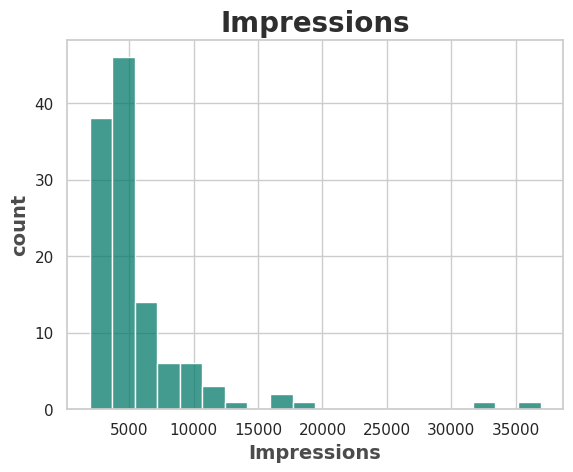

In [64]:
plt.Figure(figsize=(8,6))
sns.histplot(data=profile , x='Impressions',bins=20 ,color="#047A6A")
plt.xlabel('Impressions' , fontdict=xlabel_font_dict)
plt.ylabel('count' , fontdict=ylabel_font_dict)
plt.title('Impressions' , fontdict=title_font_dict)
plt.show()


The above chart shows that :
distribution the curve is right-skewed meaning
 - most posts have consistant reach in low to mid range 
 - only few posts are viral with high very impression compared to the others

2- what is the correlation between Impressions and likes and does having more Impressions on the post leads to more likes 

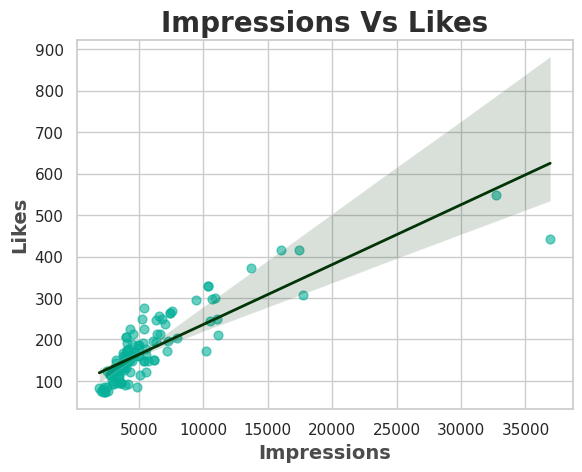

In [46]:
plt.Figure(figsize=(8,6))
sns.regplot(data=profile , x= 'Impressions' , y = 'Likes' ,scatter_kws={'alpha':0.6,'color':"#05B099",'s':40} , line_kws={'color':"#023407",'lw':2} )
plt.xlabel('Impressions' , fontdict=xlabel_font_dict)
plt.ylabel('Likes' , fontdict=ylabel_font_dict)
plt.title('Impressions Vs Likes' , fontdict=title_font_dict)
plt.show()

The above chart shows that
 - there is a strong positive relation between impressions and likes
 - the more people view your posts means you will get more likes

3- which source contributes the most to total views

In [47]:
sources_views = profile[['From Home' , 'From Hashtags' , 'From Explore']].sum().reset_index().rename(columns={'index':'Sources',0:'views'} )
fig = px.pie(sources_views,names='Sources',values='views',title='Views From Each Source',hole=0.45,color_discrete_sequence=px.colors.sequential.Greens_r)
fig.update_layout(title_font = {'size': 20,'weight': 'bold','family': 'DejaVu Sans','color': '#2E2E2E' } , legend_title_text = 'Sources')
fig.update_traces(textposition='inside',texttemplate='%{label}<br>%{percent:.1%}',hovertemplate='%{label}<br>Views: %{value:,}<br>%{percent:.1%}<extra></extra>')
fig.show()

The above chart shows that :
 - most audience come from the homepage ~45% means that most of the audience are already followers
 - hastags is the second biggest source of views ~35%
 - explore comes in last for total views ~20%

4- does having a longer caption leads to more impression

In [48]:

fig = px.scatter(profile,x='caption length' , y='Impressions' ,title='Caption Vs Impressions' , color='Likes',trendline='ols')
fig.update_layout(title_font = {'size': 20,'weight': 'bold','family': 'DejaVu Sans','color': '#2E2E2E' } )
fig.show()


The above chart shows that : 
 - there is no clear relationship between caption length and impressions on your post
 - having low to medium caption lengrh [13-52]words tend to give higher performance and peaks 

5- does the increase in the number of different hashtags increase Impressions on the post 


In [49]:
fig = px.scatter(data_frame=profile , x='number of hashtags' , y='Impressions',color = 'Likes',trendline='ols',title='Impression Vs number of hashtags')
fig.update_layout(title_font = {'size': 20,'weight': 'bold','family': 'DejaVu Sans','color': '#2E2E2E' } )
fig.show()

The above chart shows that :
 - there is very small negative relationship between number of hashtags and impressions on your post 
 - having a medium number of hashtags [17 - 20] gives better performance on posts than high number of hashtags

6- do posts with new or unique hashtags perform better than those with repeated ones

In [50]:
hash_imp_df= pd.merge(hashtags_df.reset_index().rename(columns={'index':'id'}) ,profile[['id','Impressions']] , on='id')
total_hash_usage = hash_imp_df.groupby(['Hashtags'])['id'].count().round(2).reset_index().rename(columns={'id' : 'usage'}).sort_values('usage')
total_hash_usage['usage level'] = total_hash_usage['usage'].apply(lambda x : 'rare' if x <=4 else 'common')
hash_imp_df= pd.merge(hash_imp_df,total_hash_usage[['Hashtags','usage level']],on='Hashtags')
post_hash_rarerity= hash_imp_df.groupby('id')['usage level'].value_counts().unstack(fill_value=0).reset_index()
post_hash_rarerity['hash type'] =post_hash_rarerity.apply(lambda x: 'unique' if x['rare']>=x['common'] else 'repeted', axis=1)
profile = pd.merge(profile , post_hash_rarerity[['id','hash type']] , on='id')

avg_interactions_per_hash_type =profile.groupby('hash type')[['Impressions','engagement']].mean().reset_index()
avg_interactions_per_hash_type

,hash type,Impressions,engagement
0,repeted,5782.034783,345.669565
1,unique,3460.250000,269.750000


In [51]:
fig = px.bar(avg_interactions_per_hash_type,x='hash type', y=['Impressions','engagement'],barmode='group',color_discrete_sequence=["#02672C",'#27ae60'])
fig.update_layout(title = 'Effect Of Hashtag Uniquness on Posts Performance',legend_title = 'Metrics' ,title_font = {'size': 20,'weight': 'bold','family': 'DejaVu Sans','color': '#2E2E2E'})
fig.show()

The above chart shows that :
 - the reusing and repeting of common hashtags result in more impressions and engagment on average rather than having unique hashtags(not used by viewers as much)

7- which hashtags are associated with the highest average impressions 

8- which hashtags appear most frequently in high impression posts 


In [52]:
hash_with_high_impressions= pd.merge(hashtags_df.reset_index().rename(columns={'index':'id'}) , profile[['id','Impressions','Impression Level']][(profile['Impression Level'] == 'HIGH') | (profile['Impression Level'] == 'VERY HIGH') ] ,on='id')
hash_avg_imp_and_occ = hash_with_high_impressions.groupby('Hashtags')[['Impressions','id']].aggregate({'Impressions':'mean','id':'count'}).round(2).rename(columns={'id' : 'Occurrence'}).sort_values('Impressions',ascending=False)
best_20_hash=hash_avg_imp_and_occ.head(25)

import plotly.graph_objects as go

df = best_20_hash.reset_index()

fig = go.Figure()

# --- Bar for Occurrence ---
fig.add_trace(go.Bar(
    x=df['Hashtags'],
    y=df['Occurrence'],
    name='Occurrences',
    marker_color='rgba(34,139,34,0.7)',  # green-ish
    yaxis='y1'
))

# --- Scatter for Avg Impressions ---
fig.add_trace(go.Scatter(
    x=df['Hashtags'],
    y=df['Impressions'],
    mode='lines+markers',
    name='Avg Impressions',
    marker=dict(size=10, color='black'),
    line=dict(color='black', width=2),
    yaxis='y2'
))

# Layout
fig.update_layout(
    title='Top 25 Hashtags',
    xaxis_title='Hashtags',
    yaxis=dict(
        title='Occurrences',
        side='left',
        showgrid=False
    ),
    yaxis2=dict(
        title='Avg Impressions',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    bargap=0.3,
    template='plotly_white',
    height=600
,title_font = {'size': 20,'weight': 'bold','family': 'DejaVu Sans','color': '#2E2E2E' })

fig.show()

The above chart shows that :
 - not all highly used hashtags pereform well
 - #sql and #mysql are the two best leading to high impression but underused should be tried agin to make sure
 - most relaible hashtags are the ones been used 6 times should be used more [#datascienceeducation,#datasciencejobs,#datasciencetraining,#datasciencecourse,#pythoncoding,#pythonlearning,#pythondeveloper,#pythonprogrammer]

9- does havig more impressions leads to more engagement (likes + shares + comments + saves) 
  

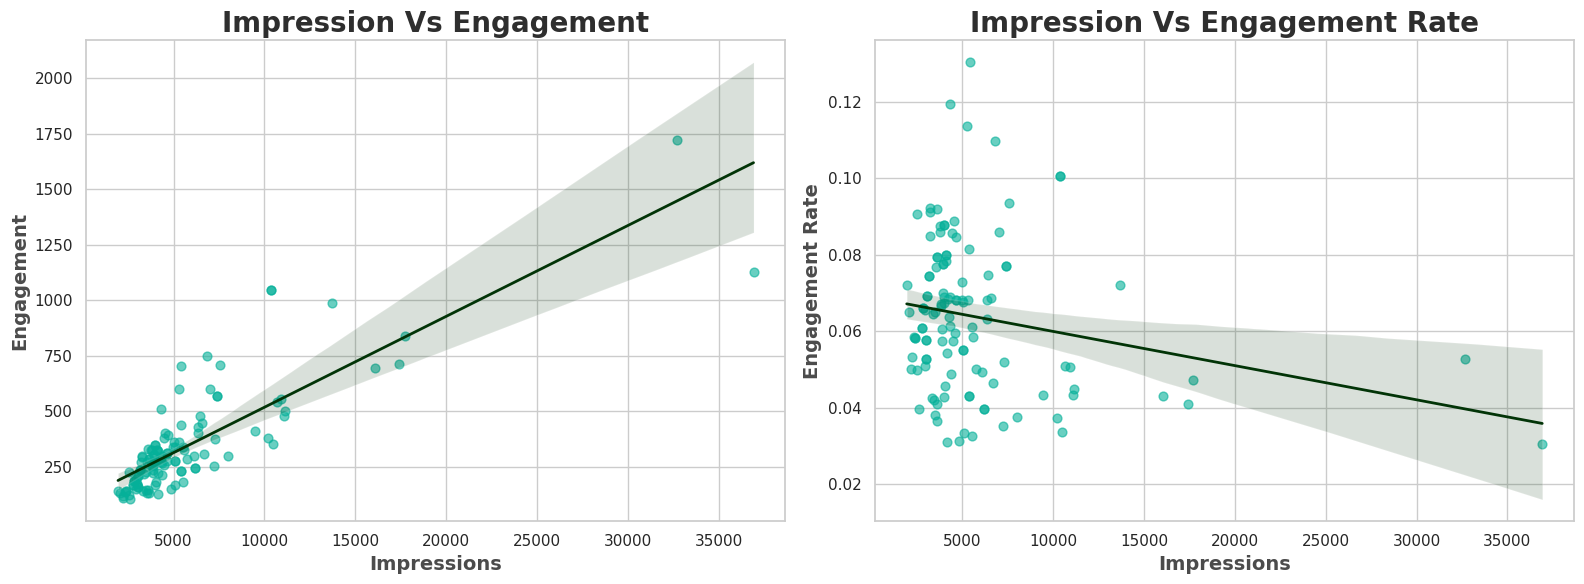

In [53]:

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.regplot(profile,x='Impressions' , y='engagement',scatter_kws={'alpha':0.6,'color':"#05B099",'s':40} , line_kws={'color':"#023407",'lw':2})
plt.xlabel('Impressions' , fontdict=xlabel_font_dict)
plt.ylabel('Engagement' , fontdict=ylabel_font_dict)
plt.title('Impression Vs Engagement' , fontdict=title_font_dict)

plt.subplot(1,2,2)
sns.regplot(profile,x='Impressions' , y='engagement rate',scatter_kws={'alpha':0.6,'color':"#05B099",'s':40} , line_kws={'color':"#023407",'lw':2})
plt.xlabel('Impressions' , fontdict=xlabel_font_dict)
plt.ylabel('Engagement Rate' , fontdict=ylabel_font_dict)
plt.title('Impression Vs Engagement Rate' , fontdict=title_font_dict)

plt.tight_layout()
plt.show()


The above chart shows that :
 - a strong postive relationship between impressions and total engaement however a negative relationship with engaement rate
 - this means that having more views result in more engagement(likes,shares,saves,comments)
 - but also the quality of veiwers gets lower as not majority of veiwers donot interact

10- does havig more impressions leads to higher Follower Conversion Rate 

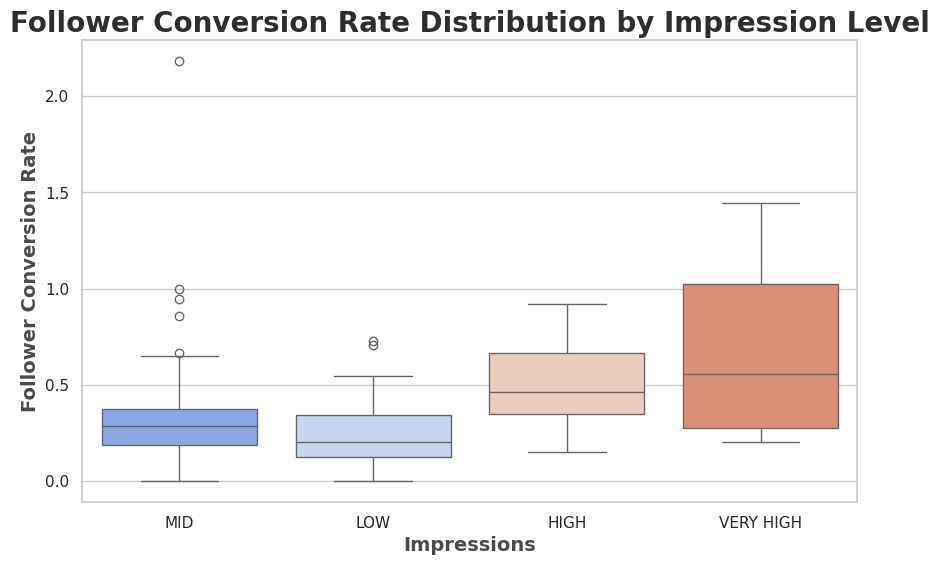

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(data=profile,x='Impression Level',y='Follows/Visits Ratio',hue='Impression Level',palette='coolwarm')
plt.title("Follower Conversion Rate Distribution by Impression Level")
plt.xlabel('Impressions' , fontdict=xlabel_font_dict)
plt.ylabel('Follower Conversion Rate' , fontdict=ylabel_font_dict)
plt.title("Follower Conversion Rate Distribution by Impression Level" , fontdict=title_font_dict)
plt.show()

The above chart shows that :
 - the posts with high and very high impression cause more conversion of viewers to followers
 - while low and mid impression posts convert fewer viewers
 - the very high group has the widest spread

11- what is the corelation between profile visits , follows , likes, comments , saves

In [55]:
correlation = profile[['Likes', 'Profile Visits', 'Follows', 'Saves', 'Comments']].corr()
fig = px.imshow(correlation,color_continuous_scale='Viridis')
fig.update_coloraxes(colorbar_title = 'correlation')
fig.update_traces(text=correlation.round(2).values,texttemplate="%{text}",textfont=dict(color="black"))
fig.update_layout(width=700,height=600,title="Correlation Heatmap of Instagram Engagement Metrics",title_x=0.5 ,title_font = {'size': 20,'weight': 'bold','family': 'DejaVu Sans','color': '#2E2E2E' })
fig.show()


The above chart shows that :
 - saves , likes ,follows and profile visits are all strongly positivly corelated
 - comments behaviour is not predictable
 - very strong corelation between profile visits and follows meaning that if the post manges to make a viewer enter the account it will make him follow 

___

## Draw Conclusion

Having a high a high performance post can come from these factors 
 - focusing on getting more follows (maybe by following them first or posting more) as most views on the posts come from followers on homepage
 - low to medium caption length [13-52]words
 - having a medium number of hashtags [17 - 20]
 - reusing the same hashtags that show high views such as #datascienceeducation,#datasciencejobs,#datasciencetraining,#datasciencecourse,#pythoncoding,#pythonlearning,#pythondeveloper,#pythonprogrammer
 - #sql and #mysql could be tried again cause they are underused to see its consistency
 - by getting more views it translate to more engagement on the post and more followers 
 - comments are a little unpredictable to mange